In [987]:
# import matplotlib as plt
import requests
from pathlib import Path
import matplotlib.pyplot as plt
# !pip install graphviz
from torchview import draw_graph
from torch import nn
from typing import Tuple
# !pip install torch
import torch
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from helper_functions import plot_predictions, plot_decision_boundary
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
#!pip install tensorflow
import tensorflow as tf

In [988]:
data = pd.read_csv('bcancer_data.csv')
data.shape
data

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1,1,1,2,1,2,1,1,0
1,5,1,1,1,1,1,3,1,1,0
2,4,1,1,1,2,1,1,1,1,0
3,2,1,1,1,2,1,2,1,1,0
4,1,2,3,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
535,1,1,1,1,2,1,1,1,1,0
536,3,1,1,1,2,1,2,3,1,0
537,4,1,1,1,2,1,1,1,1,0
538,2,1,1,1,2,1,1,1,1,0


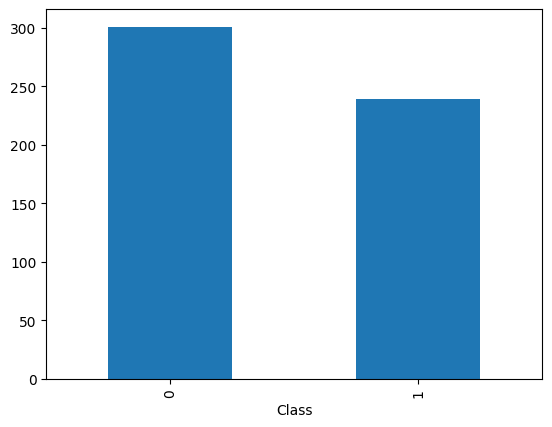

In [989]:
data.Class.value_counts().plot(kind="bar");


In [990]:
#Task 1: split data into two datasets
train_set, test_set = train_test_split(data, test_size=0.2)



In [991]:
test_set = test_set.reset_index(drop=True)
test_set


,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,10,5,5,6,3,10,7,9,2,1
1,2,1,1,1,2,1,3,1,1,0
2,4,4,2,1,2,5,2,1,2,0
3,2,1,1,2,2,1,3,1,1,0
4,10,10,10,6,8,4,8,5,1,1
...,...,...,...,...,...,...,...,...,...,...
103,8,7,6,4,4,10,5,1,1,1
104,8,4,7,1,3,10,3,9,2,1
105,8,4,4,5,4,7,7,8,2,0
106,8,10,10,8,7,10,9,7,1,1


In [992]:
train_set = train_set.reset_index(drop=True)
train_set

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1,1,1,2,1,3,1,1,0
1,10,8,8,2,8,10,4,8,10,1
2,5,1,1,2,1,1,2,1,1,0
3,2,5,3,3,6,7,7,5,1,1
4,10,8,8,2,3,4,8,7,8,1
...,...,...,...,...,...,...,...,...,...,...
427,1,1,1,1,2,1,2,1,1,0
428,5,1,1,3,2,1,1,1,1,0
429,2,1,1,2,2,1,1,1,1,0
430,3,1,1,1,2,1,1,1,1,0


In [993]:
train_set.shape, test_set.shape

((432, 10), (108, 10))

In [994]:
#Prepare data for the model(4 inputs)
def create_dataset(data: pd.DataFrame):
    features = torch.tensor(
        data[['Cl.thickness', 'Cell.size', 'Cell.shape','Marg.adhesion']].to_numpy(), 
        dtype=torch.float
    )
    labels = torch.tensor(data['Class'], dtype= torch.long)
    return features, labels

In [995]:
X_train, y_train = create_dataset(train_set)
X_test, y_test = create_dataset(test_set) 

In [996]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([432, 4]),
 torch.Size([432]),
 torch.Size([108, 4]),
 torch.Size([108]))

In [997]:
#Build classification model with 4 input features
class Classifier(nn.Module):
    def __init__(self, n_features: int,n_classes: int):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=4, out_features=8)
        self.linear_layer_2 = nn.Linear(in_features=8, out_features=1)

    def forward(self, features):
        x = torch.relu(self.linear_layer_1(features))
        return self.linear_layer_2(x)
    

In [998]:
model = Classifier(n_features=4, n_classes=2)
model

Classifier(
  (linear_layer_1): Linear(in_features=4, out_features=8, bias=True)
  (linear_layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [999]:
result = model(X_train)
result[:2]

tensor([[0.7178],
        [4.2270]], grad_fn=<SliceBackward0>)

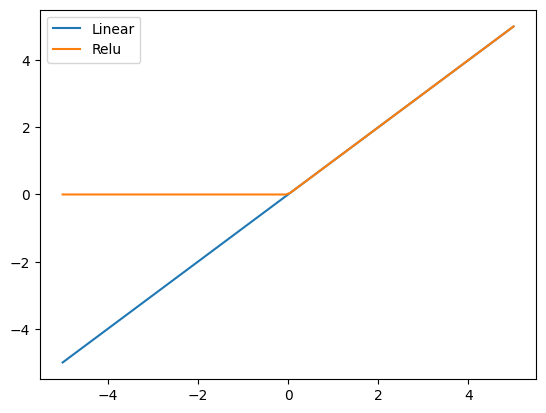

In [1001]:
x = torch.linspace(-5, 5, 100)
relu = torch.relu(x)

plt.plot(x.numpy(), x.numpy(), label = 'Linear')
plt.plot(x.numpy(), relu.numpy(), label = 'Relu')
plt.legend()
plt.show();

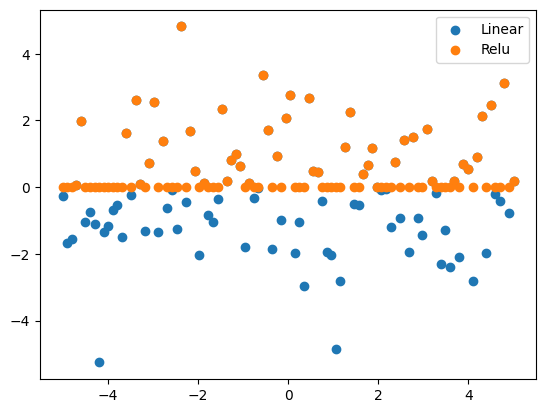

In [1002]:
x = torch.linspace(-5, 5, 100)

linear = nn.Linear(in_features=100, out_features=100)
linear.requires_grad_(False)
y_linear = linear(x)
y_relu = torch.relu(y_linear)

plt.scatter(x.numpy(), y_linear.numpy(), label = 'Linear')
plt.scatter(x.numpy(), y_relu.numpy(), label = 'Relu')
plt.legend()
plt.show()

In [1003]:
#Create Loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [1004]:
# Calculate accuracy 
def accuracy_function(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item()
    acc = (correct / len(y_preds)) * 100
    return acc

In [1005]:
y_logits = model(X_test)[:5]
y_logits

tensor([[4.1590],
        [1.0612],
        [1.8051],
        [1.0430],
        [4.6788]], grad_fn=<SliceBackward0>)

In [1006]:
#use relu on model logits
y_pred_probs = torch.relu(y_logits)
y_pred_probs

tensor([[4.1590],
        [1.0612],
        [1.8051],
        [1.0430],
        [4.6788]], grad_fn=<ReluBackward0>)

In [1007]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.relu(model(X_test)[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([4., 1., 2., 1., 5.], grad_fn=<SqueezeBackward0>)

In [1008]:
y_test[:5]

tensor([1, 0, 0, 0, 1])

In [1009]:
#Set num of Epochs
torch.manual_seed(42)
epochs = 100
X_train, y_train = X_train, y_train.float()
X_test, y_test = X_test, y_test.float()

#Build and train evaluation loop
for epoch in range(epochs):
    #Train model
    model.train()

    #Forward pass
    y_logits = model(X_train).squeeze().float()
    y_preds = torch.round(torch.relu(y_logits))

    #Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_function(y_true = y_train, y_preds=y_preds)

    #optimize zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #optimizer Step
    optimizer.step()

    #Testing
    model.eval() 
    with torch.inference_mode():
        # Foward pass
        test_logits = model(X_test).squeeze().float()
        test_preds = torch.round(torch.relu(test_logits))
        # Calculate loss and Accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_preds=test_preds)
    #Result
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.93197, Accuracy: 0.46% | Test loss: 0.72937, Test acc: 26.85%
Epoch: 20 | Loss: 0.57118, Accuracy: 86.57% | Test loss: 0.56919, Test acc: 86.11%
Epoch: 40 | Loss: 0.47552, Accuracy: 74.77% | Test loss: 0.47801, Test acc: 72.22%
Epoch: 60 | Loss: 0.39679, Accuracy: 68.29% | Test loss: 0.40673, Test acc: 66.67%
Epoch: 80 | Loss: 0.34376, Accuracy: 63.19% | Test loss: 0.35853, Test acc: 65.74%


In [1010]:
#Make predicitons
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.relu(model(X_test))).squeeze()
y_preds[:10], y_test[:10] # want preds in same format as truth labels

(tensor([1., 0., 0., 0., 4., 5., 0., 0., 0., 4.]),
 tensor([1., 0., 0., 0., 1., 1., 1., 0., 0., 1.]))

In [1011]:
# Build confusion matrix
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [1012]:
model_logits = LogisticRegression()
model_logits.fit(X_train, y_train)
prediction = model_logits.predict(X_test)

In [1013]:
score = accuracy_score(y_test, prediction)
score

0.9629629629629629

In [1017]:
#The confusion matrix
confusion_matrix(y_test, prediction)

array([[60,  2],
       [ 2, 44]], dtype=int64)

In [1015]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
(tn, fp, fn, tp)

(60, 2, 2, 44)

In [1016]:
#Result for Accuracy, Precision, and Recall
matrix = classification_report(y_test, prediction, output_dict=True)
print("Accuracy:", matrix['accuracy'])
print("Precision:", matrix['macro avg']['precision'])
print("Recall:", matrix['macro avg']['recall'])

Accuracy: 0.9629629629629629
Precision: 0.9621318373071529
Recall: 0.9621318373071529


In [ ]:
#/***************************************************************************************
# CITATION
# *    Title: <Lab 5 Classification in PyTorch>
# *    Author: <Dr. Mehdi Karga>
# *    Date: <Feb 13 2024>
#***************************************************************************************/
